# 1. Import packages

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
# To show plots like jupyter notebook

# 2. Load Data

In [17]:
data1 = pd.read_csv("train.csv")

# 3. Data Prepration

In [18]:
# Checking datatypes for variables in HousePrice dataframe
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [19]:
# Checking data size
data1.shape

(1460, 81)

In [20]:
data1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [21]:
# data1.describe(percentile = none, include = None, exclude = None)
# dataframe with categorical features
data1.describe(include = ['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [22]:
data1.describe(include = 'int64')

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 3.2 Splitting target varible
Here the target variable is seperated from data and the distribution is checked

In [23]:
target = data1['SalePrice']
target.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

C:\Users\sony\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

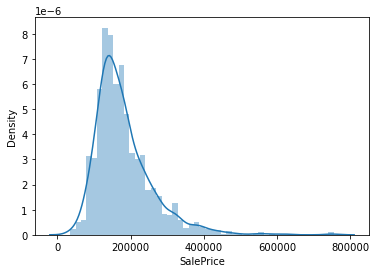

In [24]:
# Visualizing the distribution of saleprice (Dependent) variable
import seaborn as sns
sns.distplot(target, hist = True)

As we can see the distribution is left skewed, so in order to make it normally distributed, we need to use log transformation

In [25]:
# Log transformation (To make the data normal distributed)

target_log = np.log(target)

C:\Users\sony\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

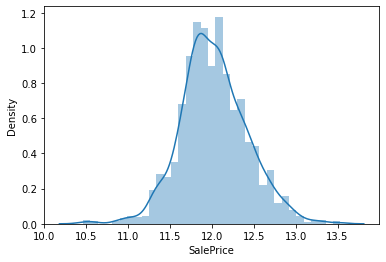

In [26]:
sns.distplot(target_log,hist = True)

array([[<AxesSubplot:title={'center':'Scale Price'}>,
        <AxesSubplot:title={'center':'Log Sale Price'}>]], dtype=object)

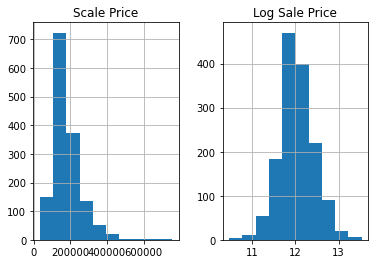

In [27]:
import matplotlib
# matplotlib.rcParams['figure.figsize'] = (18.0,6.0)

# Matplotlib uses matplotlibrc configuration files to customize all kinds of properties, which we call 'rc settings' or 'rc parameters'.
#You can control the defaults of almost every property in Matplotlib:
# figure size and DPI, line width, color and style, axes, axis and grid properties, text and font properties and so on

prices = pd.DataFrame({'Scale Price': data1['SalePrice'],"Log Sale Price": target_log})

prices.hist()

After using the log Transformation, the Target variable is normally distributed

In [28]:
# Drop target variable from dataset
raw_data = data1
data1 = data1.drop(["SalePrice"],axis = 1)
# Axis = 1 indicates that you are dropping the column, axis = 0 indicates that you are dropping the row

#data1 = data1.drop(["SalePrice"],axis = 1, inplace = True)

data1.head()
# data = data1.drop("Ireland", axis = 0)
#delete all rows with label Ireland

# delete first five rows using iloc selector
# data = data.iloc[5:,]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


# 3.3 Feature Engineering
## List of techniques
1. Imputation (fill Missing values)
2. Handling Outliers
3. Binning
4. Log Transform (Skewed data is distributed with log transformation)
5. One Hot Encoding (Multiple values in table)
6. Grouping Operations
7. Feature Split (to split the feature eg. seperating name and last name)
8. Scaling
9. Extracting Date

In [29]:
data1.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,True,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False


In [30]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [31]:
data1.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [32]:
# MSSubClass: Identifies the type of dwelling involved in the sale.

#MSSubClass = The building class
data1["MSSubClass"] = data1["MSSubClass"].apply(str)

# Changing OverallCond into categorical variable
data1['OverallCond'] = data1["OverallCond"].astype(str)

#Year and month sold are transformed into categorical features
data1['YrSold'] = data1['YrSold'].astype(str)
data1['MoSold'] = data1['MoSold'].astype(str)

In [33]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [34]:
# Adding Total sqfootage feature

# TotalBsmtSF: Total square feet of basement Area

# 1stFlrSF: First floor square feet

# 2ndFlrSF: Second floor square feet

data1['TotalSF'] = data1['TotalBsmtSF'] + data1['1stFlrSF'] + data1['2ndFlrSF']

# data1 = data1.drop(columns = ['TotalBsmtSF','1stFlrSF','2ndFlrSF','Id'])
# Removing TotalBsmtSF, 1stFlrSF ,2ndFlrSF and ID
data1 = data1.drop(['TotalBsmtSF'],axis = 1)
data1 = data1.drop(['1stFlrSF'],axis = 1)
data1 = data1.drop(['2ndFlrSF'],axis = 1)
data1 = data1.drop(['Id'],axis = 1)
data1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,2566
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,2524
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,2706
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,2473
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,3343


# For loop with if statement with assignment operator

In [35]:
# Save all categorical columns in list
categorical_columns =  [col for col in data1.columns.values if data1[col].dtype == 'object']

# Dataframe with categorical features
data_cat = data1[categorical_columns]

# Dataframe with numerical features 
data_num = data1.drop(categorical_columns,axis = 1)

In [36]:
data_num.describe()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,5.844521,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2567.048630
std,24.284752,9981.264932,1.382997,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,48.623081,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,821.714421
min,21.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000
25%,59.000000,7553.500000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,0.000000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.500000
50%,69.000000,9478.500000,6.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,0.000000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2474.000000
75%,80.000000,11601.500000,7.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,0.000000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3004.000000
max,313.000000,215245.000000,10.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,572.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,11752.000000


In [37]:
data_cat.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,NaN,NaN,NaN,2,2008,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,TA,TA,Y,NaN,NaN,NaN,5,2007,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,NaN,NaN,NaN,9,2008,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,TA,TA,Y,NaN,NaN,NaN,2,2006,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,TA,TA,Y,NaN,NaN,NaN,12,2008,WD,Normal


# 3.5 Reduce Skewness for Numerical Features

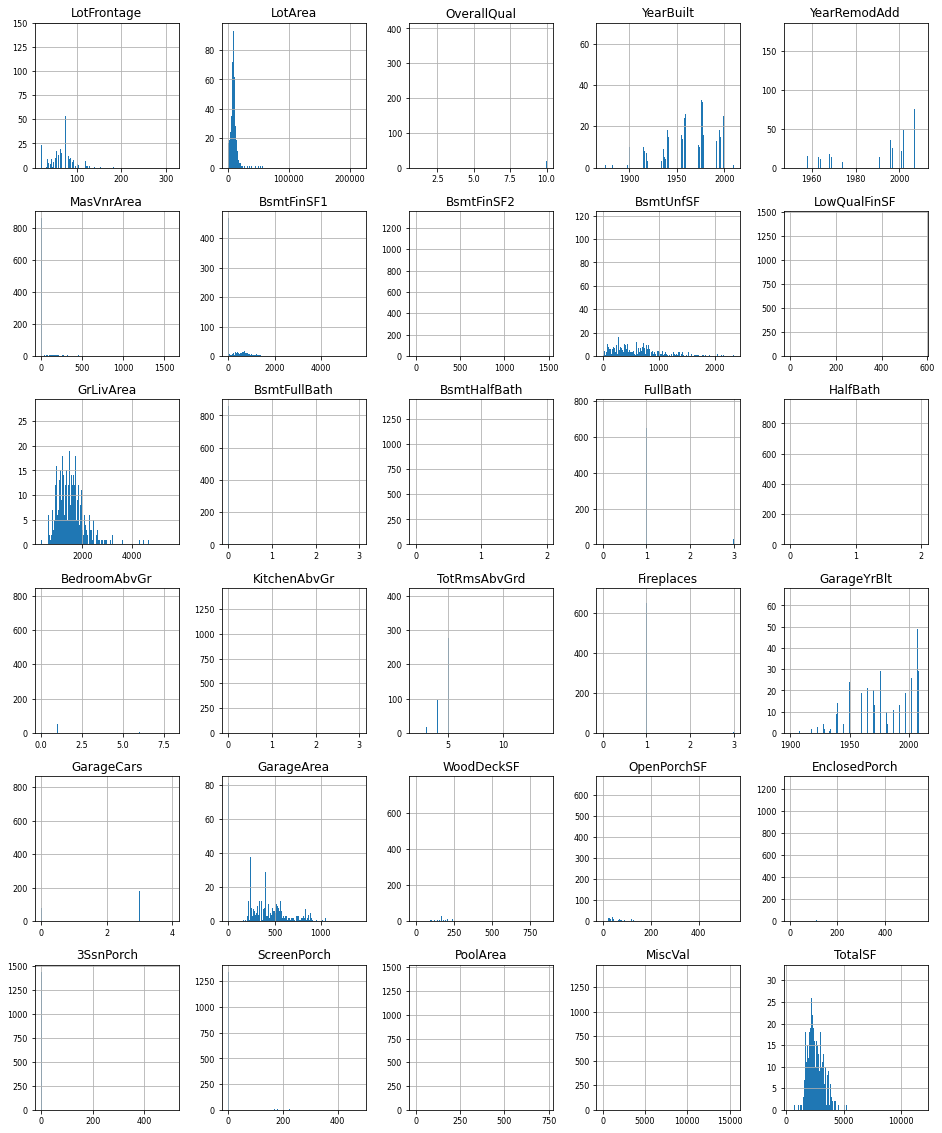

In [38]:
data_num.hist(figsize = (16,20),bins = 500, xlabelsize = 8, ylabelsize = 8);
# Avoid having the matplotlib verbose informations

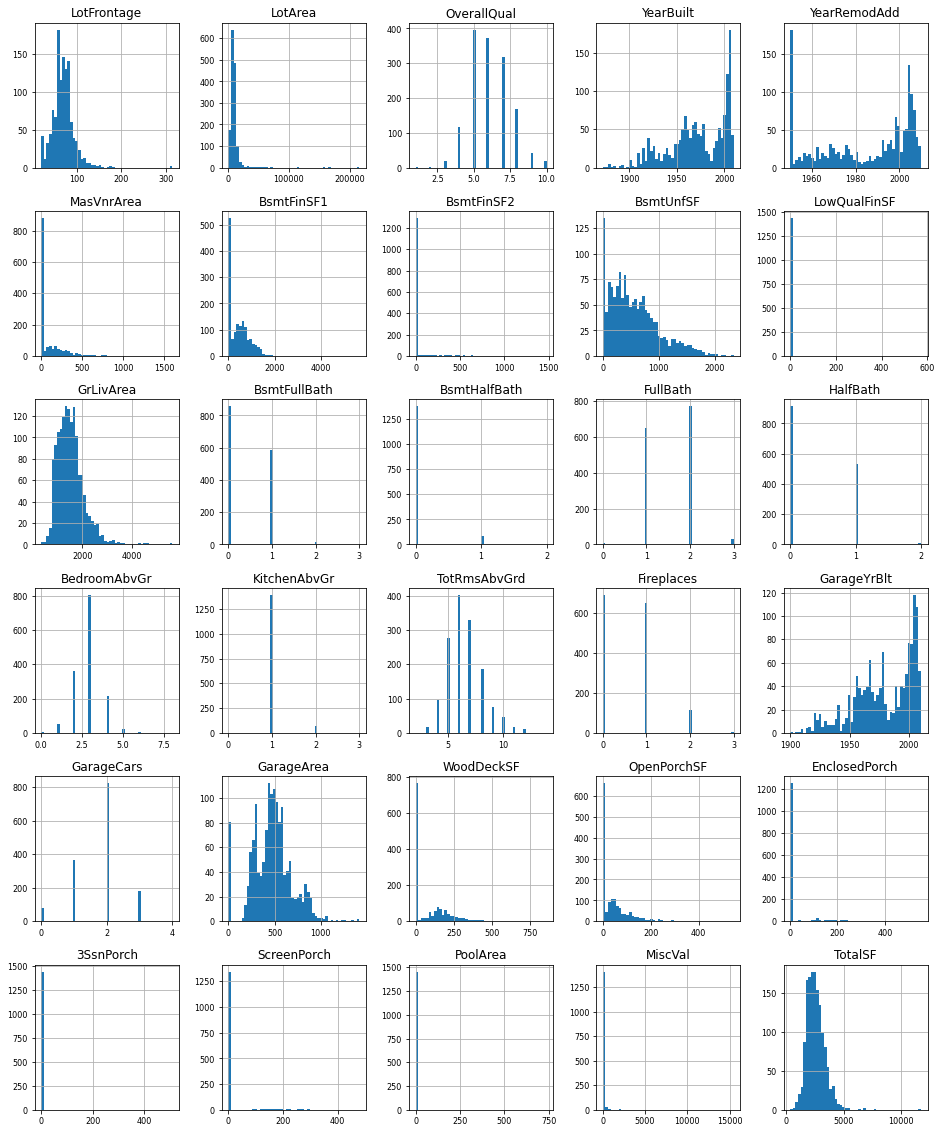

In [39]:
data_num.hist(figsize = (16,20),bins = 50, xlabelsize = 8, ylabelsize = 8);
# Avoid having the matplotlib verbose informations

If the skewness is less than -1 or greater than +1, the distribution is highly skewed.
If the skewness is between -1 and -1/2 or between +1/2 and 1, the distribution is moderately skewed.
If the skewness is between -1/2 and +1/2, the distribution is approximately symmetric.

In [40]:
from scipy.stats import skew
data_num_skew = data_num.apply(lambda x: skew(x.dropna()))
print(data_num_skew)
data_num_skew = data_num_skew[data_num_skew > 0.75]
print("\n","\n",data_num_skew)

# Apply log + 1 transformation for all numeric features with skewness over 0.75
data_num[data_num_skew.index] = np.log1p(data_num[data_num_skew.index])

LotFrontage       2.160866
LotArea          12.195142
OverallQual       0.216721
YearBuilt        -0.612831
YearRemodAdd     -0.503044
MasVnrArea        2.666326
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
BsmtUnfSF         0.919323
LowQualFinSF      9.002080
GrLivArea         1.365156
BsmtFullBath      0.595454
BsmtHalfBath      4.099186
FullBath          0.036524
HalfBath          0.675203
BedroomAbvGr      0.211572
KitchenAbvGr      4.483784
TotRmsAbvGrd      0.675646
Fireplaces        0.648898
GarageYrBlt      -0.648708
GarageCars       -0.342197
GarageArea        0.179796
WoodDeckSF        1.539792
OpenPorchSF       2.361912
EnclosedPorch     3.086696
3SsnPorch        10.293752
ScreenPorch       4.117977
PoolArea         14.813135
MiscVal          24.451640
TotalSF           1.774874
dtype: float64

 
 LotFrontage       2.160866
LotArea          12.195142
MasVnrArea        2.666326
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
BsmtUnfSF         0.919323
LowQualFi

In [41]:
data_num

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF
0,4.189655,9.042040,7,2003,2003,5.283204,6.561031,0.000000,5.017280,0.0,...,2,548,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.000000,7.850493
1,4.394449,9.169623,6,1976,1976,0.000000,6.886532,0.000000,5.652489,0.0,...,2,460,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.000000,7.833996
2,4.234107,9.328212,7,2001,2002,5.093750,6.188264,0.000000,6.075346,0.0,...,2,608,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.000000,7.903596
3,4.110874,9.164401,7,1915,1970,0.000000,5.379897,0.000000,6.293419,0.0,...,3,642,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.000000,7.813592
4,4.442651,9.565284,8,2000,2000,5.860786,6.486161,0.000000,6.196444,0.0,...,3,836,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.000000,8.114923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.143135,8.976894,6,1999,2000,0.000000,0.000000,0.000000,6.860664,0.0,...,2,460,0.000000,3.713572,0.000000,0.0,0.0,0.0,0.000000,7.863651
1456,4.454347,9.486152,6,1978,1988,4.787492,6.673298,5.099866,6.380123,0.0,...,2,500,5.857933,0.000000,0.000000,0.0,0.0,0.0,0.000000,8.193124
1457,4.204693,9.109746,7,1941,2006,0.000000,5.620401,0.000000,6.777647,0.0,...,1,252,0.000000,4.110874,0.000000,0.0,0.0,0.0,7.824446,8.158516
1458,4.234107,9.181735,5,1950,1996,0.000000,3.912023,6.937314,0.000000,0.0,...,1,240,5.905362,0.000000,4.727388,0.0,0.0,0.0,0.000000,7.676474


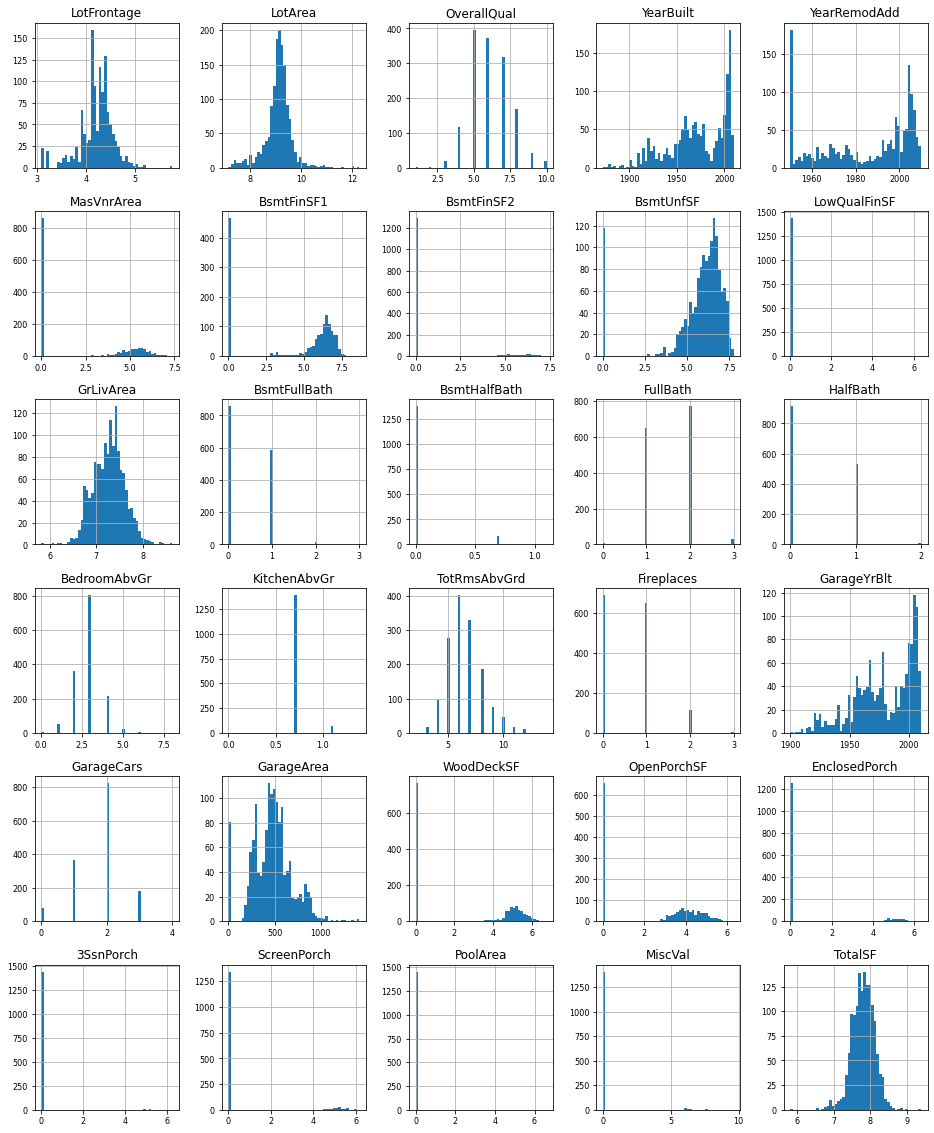

In [42]:
data_num.hist(figsize = (16,20),bins = 50, xlabelsize = 8, ylabelsize = 8);

# Mean Normalization


# Normalization usually means to scale a variable to have values between 0 and 1
Formula: x normalized = (x - x minimum)/(x maximum - x minimum)

In [43]:
data_num = ((data_num - data_num.min())/(data_num.max() - data_num.min()))


In [44]:
data_num.describe()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.419834,0.379763,0.566591,0.719332,0.581096,0.288945,0.489636,0.089825,0.728201,0.015717,...,0.441781,0.333554,0.363782,0.366070,0.110527,0.013747,0.066496,0.004607,0.024196,0.558995
std,0.130242,0.101273,0.153666,0.218862,0.344090,0.356618,0.346361,0.252870,0.239024,0.117677,...,0.186829,0.150779,0.384395,0.341309,0.273511,0.107001,0.227206,0.066414,0.127067,0.088094
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.377415,0.344320,0.444444,0.594203,0.283333,0.000000,0.000000,0.000000,0.697681,0.000000,...,0.250000,0.235896,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.503694
50%,0.435403,0.388752,0.555556,0.731884,0.733333,0.000000,0.689000,0.000000,0.795533,0.000000,...,0.500000,0.338505,0.000000,0.516644,0.000000,0.000000,0.000000,0.000000,0.000000,0.562118
75%,0.490307,0.428310,0.666667,0.927536,0.900000,0.693647,0.760527,0.000000,0.863236,0.000000,...,0.500000,0.406206,0.759467,0.671412,0.000000,0.000000,0.000000,0.000000,0.000000,0.616657
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>],
       [<AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>],
       [<AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>,
        <AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'HalfBath'}>],
       [<AxesSubplot:title={'center':'BedroomAbvGr'}>,
        <AxesSubplot:title={'center':'KitchenAbvGr'}>,
        <AxesSubplot:title={'center':'TotRmsAbvGrd'}>,
        <AxesSubplot:title={'center':

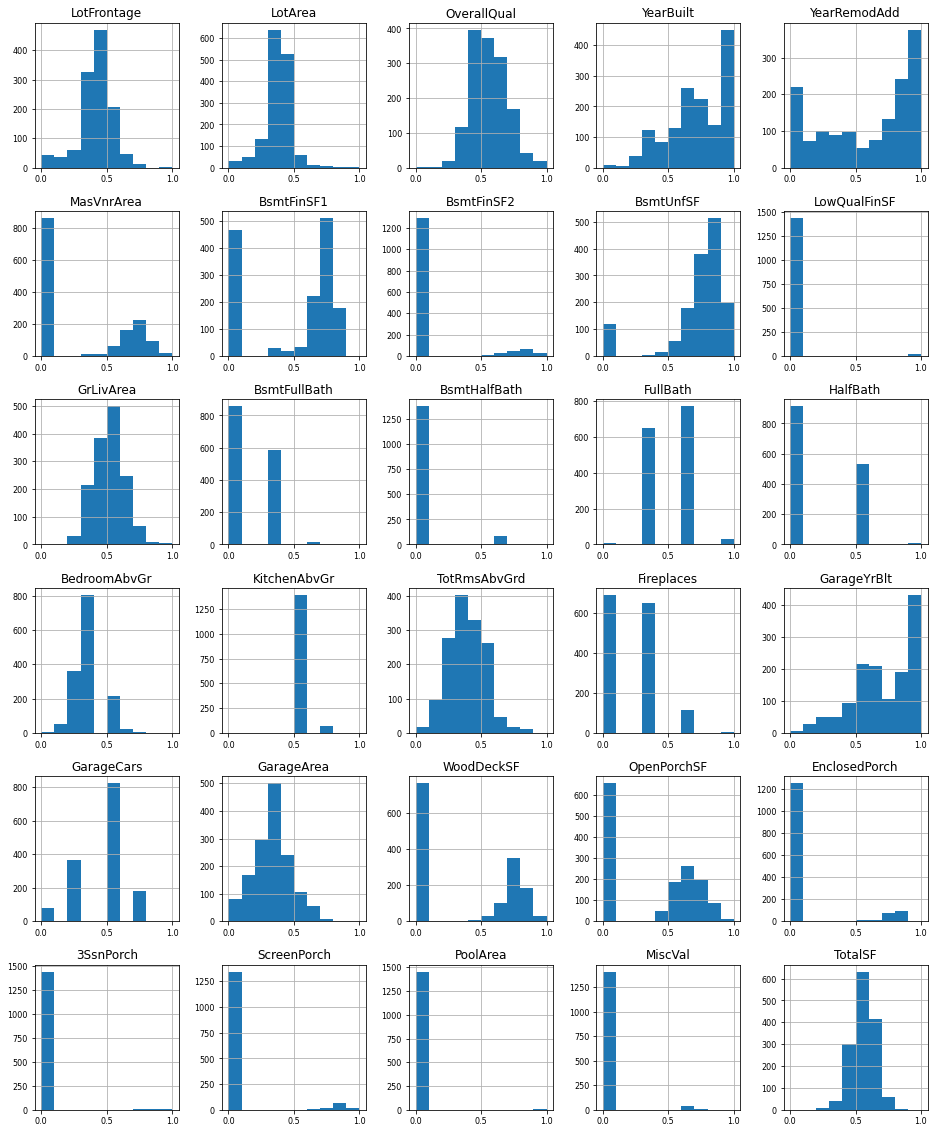

In [45]:
data_num.hist(figsize = (16,20), xlabelsize = 8, ylabelsize = 8)

After Mean Normalization the data scale will change and will not affect original data distribution

# 4. Missing Data Analysis

If the missing values are not handled properly we may end up drawing an inaccurate inference about data. Due to improper handling, the result obtained will differ from the Ones where the missing values are present

<AxesSubplot:>

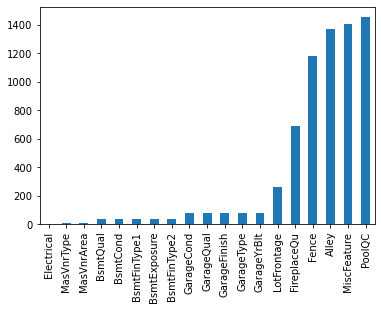

In [46]:
null_in_HousePrice = data1.isnull().sum()
null_in_HousePrice = null_in_HousePrice[null_in_HousePrice > 0]
null_in_HousePrice.sort_values(inplace = True)
null_in_HousePrice.plot.bar()

In [47]:
# Printing total numbers and percentage of missing data

total = data1.isnull().sum().sort_values(ascending = False)
percent = (data1.isnull().sum()/data1.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total,percent],axis = 1,keys = ['Total','Percent'])

In [48]:
missing_data.head(15)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


# 5.1 Handling Missing values in the numerical columns

In [49]:
# The shape attribute for numpy arrays returns the dimenstions of the array
# If y has n rows and m columns, then Y.shape is (n,m). So Y.shape[0] is n

data_len = data_num.shape[0]
print(data_len)


1460


In [50]:
for col in data_num.columns.values:
    missing_values = data_num[col].isnull().sum()
    
    # print("{} - missing: {} ({:0.2f}%)".format(col, missing_values,missing_values/data_len*100))
    # drop column if there is more than 50 missing values
    if missing_values > 260:
        data_num = data_num.drop(col,axis = 1)
    # if there is less than 260 missing values than fill in with median value of column
    else:
        data_num = data_num.fillna(data_num[col].median())

# Handling Missing values in Categorical columns
Here we do data imputation. If the number of missing values is more than 50, we drop the column from the analysis

In [51]:
# y.shape is (m,n)
data_len = data_cat.shape[0]
print(data_len)

1460


In [52]:
# Check the number of missing values in the dataframe
for col in data_cat.columns.values:
    missing_values = data_cat[col].isnull().sum()
    
    # drop the column if there are more than 50 missing values
    if missing_values > 50:
        print("Droping Column: {} ".format(col))
        data_cat.drop(col,axis = 1)
        
    else:
        # The pass statement in python is used when a statement is required syntatically but you do not want any command or code to be executed.
        pass

Droping Column: Alley 
Droping Column: FireplaceQu 
Droping Column: GarageType 
Droping Column: GarageFinish 
Droping Column: GarageQual 
Droping Column: GarageCond 
Droping Column: PoolQC 
Droping Column: Fence 
Droping Column: MiscFeature 


In [53]:
data_cat.describe()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
count,1460,1460,1460,91,1460,1460,1460,1460,1460,1460,...,1379,1379,1460,7,281,54,1460,1460,1460,1460
unique,15,5,2,2,4,4,2,5,3,25,...,5,5,3,3,4,4,12,5,9,6
top,20,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,TA,TA,Y,Gd,MnPrv,Shed,6,2009,WD,Normal
freq,536,1151,1454,50,925,1311,1459,1052,1382,225,...,1311,1326,1340,3,157,49,253,338,1267,1198


# Dummy Coding

# For Example: 2 = 0010, 3 = 0011

In [54]:
# Dummy coding refers to the process of coding a categorical variable into dichotomous variables
data_cat.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [55]:
# Using pandas.get_dummies function to convert categorical variable into dummy/indicator variable
data_cat_dummies = pd.get_dummies(data_cat,drop_first = True)

# Why is drop_first - True given here???????
it was 10*293 if not giving drop_first = true and otherwise it is 10*246

In [56]:
# Viewing the dimensionality of the dataframe
data_cat_dummies.head(10)

,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
7,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [57]:
print("Numerical Features: " + str(len(data_num.columns)))
print("Categorical Features: " + str(len(data_cat_dummies.columns)))

Numerical Features: 30
Categorical Features: 246


In [58]:
# Using Concat function, we merge two dataframes for further analysis
newdata = pd.concat([data_num,data_cat_dummies],axis = 1)

# Expolatory data Analysis

C:\Users\sony\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\sony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


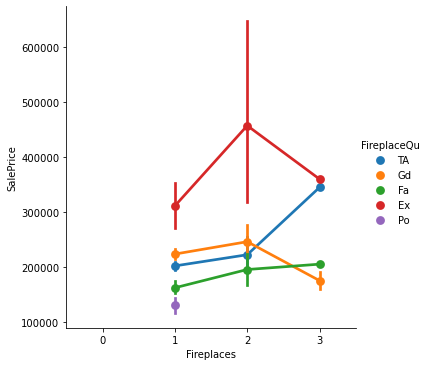

In [59]:
# Fireplaces: Number of fireplaces
# FireplaceQu: Fireplace quality

# Ex -> Excellent
# Gd -> Good - Masonry Fireplace in main level 
# TA -> Average - Prefabricated fireplace in main living area or Masonry fireplace in basement
# Fa -> Fair - Prefabricated fireplace in basement
# Po -> Poor - Ben Franklin Stove
# NA -> No fireplace

# A factor plot is simply the same plot generated for different response and factor variables and arranged on a single page.

sns.factorplot("Fireplaces","SalePrice",data = raw_data, hue = "FireplaceQu")

If there are two fireplaces, the Sales Price increases. Also, if there are fireplace of Excellent quality in the house the Sales Price increases.

In [60]:
# If fireplace is missing that means that doesn't have a FireplaceQu
FireplaceQu = raw_data['FireplaceQu'].fillna('None')
pd.crosstab(raw_data.Fireplaces, raw_data.FireplaceQu)

FireplaceQu,Ex,Fa,Gd,Po,TA
Fireplaces,,,,,
1,19,28,324,20,259
2,4,4,54,0,53
3,1,1,2,0,1


C:\Users\sony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

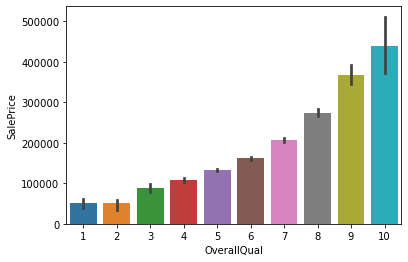

In [61]:
# OverallQual: Rates the overall material and finish of the house 
# 10 -> Very Excellent
# 9 -> Excellent
#8 -> Very Good
#7 -> Good 
#6 -> Above Average
#5 -> Average
#4 -> Below Average
#3 -> Fair
#2 -> Poor
#1 -> Very Poor

# Shows the relationship between a numerical variable and a categorical variable

sns.barplot(raw_data.OverallQual,raw_data.SalePrice)

As we can see, the sales price increases with the increase in overall Quality

[1151  218   65   16   10]


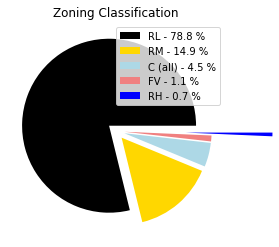

In [62]:
# If you have several values per group, showing only the average dissimulate the part of the information.
# In this case, consider doing a boxplot or a violinplot.
# Atleast you should show the number of observations per plot 

# MSZoning is a column in raw_data

labels = raw_data["MSZoning"].unique()
sizes = raw_data["MSZoning"].value_counts().values

print(sizes)

explode = [0.1,0.1,0.1,0.1,0.8]
# Explode is used in pie chart for making the wedges in piechart seperate from each other
percent = 100.*sizes/sizes.sum()

labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(labels,percent)]

colors = ['black','gold','lightblue','lightcoral','blue']
patches,texts = plt.pie(sizes,colors = colors,explode = explode,shadow = False, startangle = 0)

# wedgeprops = {'linewidth':3, 'edgecolor':'orange'}
plt.legend(patches,labels,loc = 'best')
plt.title('Zoning Classification')
plt.show()

[1151  218   65   16   10]


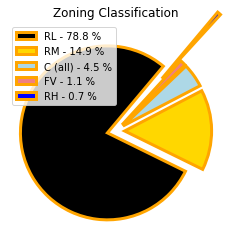

In [63]:
# If you have several values per group, showing only the average dissimulate the part of the information.
# In this case, consider doing a boxplot or a violinplot.
# Atleast you should show the number of observations per plot 

# MSZoning is a column in raw_data

labels = raw_data["MSZoning"].unique()
sizes = raw_data["MSZoning"].value_counts().values

print(sizes)

explode = [0.1,0.1,0.1,0.1,0.8]
# Explode is used in pie chart for making the wedges in piechart seperate from each other
percent = 100.*sizes/sizes.sum()

labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(labels,percent)]

colors = ['black','gold','lightblue','lightcoral','blue']
patches,texts = plt.pie(sizes,colors = colors,explode = explode,shadow = False, startangle = 50, 
                        wedgeprops = {'linewidth':3, 'edgecolor':'orange'})

# wedgeprops = {'linewidth':3, 'edgecolor':'orange'}
plt.legend(patches,labels,loc = 'best')
plt.title('Zoning Classification')
plt.show()

C:\Users\sony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Sale Price')

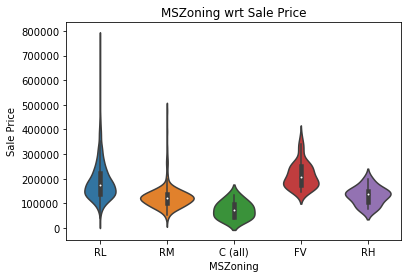

In [64]:
# Violin Plot combines two aspects of a distribution in a single visualization. 
#The features of a box plot and the probability density funciton

sns.violinplot(raw_data.MSZoning,raw_data['SalePrice'])
plt.title('MSZoning wrt Sale Price')
plt.xlabel('MSZoning')
plt.ylabel('Sale Price')

Text(0.5, 0, 'Price per square feet')

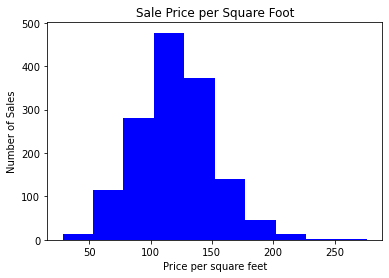

In [65]:
# GrivArea: Above grade (ground) living area square feet 
# SalePriceSF = Sale price Square feet

SalePriceSF = raw_data['SalePrice']/raw_data['GrLivArea']
plt.hist(SalePriceSF,color = "blue")
plt.title("Sale Price per Square Foot")
plt.ylabel('Number of Sales')
plt.xlabel('Price per square feet')

Most of the sales happend in 100 and 150 square feet

Text(0.5, 0, 'Construction age of house')

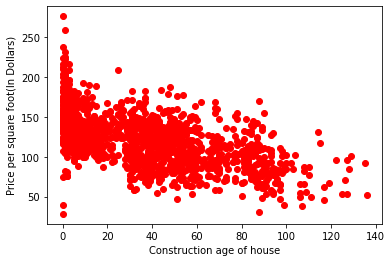

In [66]:
ConstructionAge = raw_data['YrSold'] - raw_data['YearBuilt']
plt.scatter(ConstructionAge,SalePriceSF,color = 'red')
plt.ylabel('Price per square foot(In Dollars)')
plt.xlabel('Construction age of house')

In [67]:
# Strip Plot is the scatter plot where one of the variable is categorical.
# It plots the distribution of variable for each category as individual end points.
# For vertical strip plots distribution of continuous values are led out parallel with the y axis and the distinct categories are spaced out along the x axis


For the above representation, price of house goes down with its age

C:\Users\sony\anaconda3\lib\site-packages\seaborn\categorical.py:2792: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


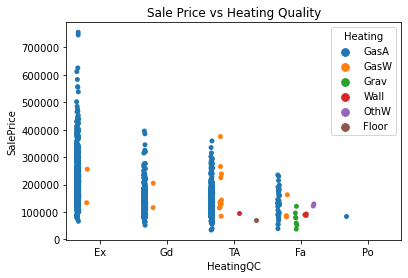

In [68]:
# Heating: Type of heating 
# Floor -> Floor furnance
# GasA -> Gas forced warm air furnance
# GasW -> Gas hot water or steam heat
# Grav -> Gravity furnance
# OthW -> Hot water or steam heat other than gas
#  Wall -> Wall furnance

# HeatingQC: Heat quality and condition
# Ex -> Excellent
# Gd -> Good 
# TA -> Average
# Fa -> Fair
# Po -> Poor

# CentralAir: Central air conditioning
# N -> No
# Y -> Yes

# Heating and AC arrangements

sns.stripplot(x = 'HeatingQC',y = 'SalePrice',data = raw_data,hue = 'Heating',jitter = True,split = True)
plt.title('Sale Price vs Heating Quality');

C:\Users\sony\anaconda3\lib\site-packages\seaborn\categorical.py:2792: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


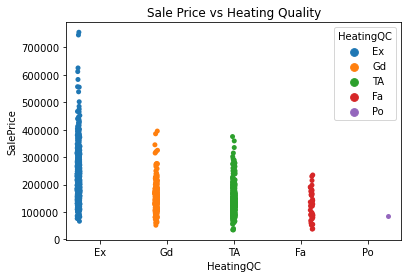

In [69]:
sns.stripplot(x = 'HeatingQC',y = 'SalePrice',data = raw_data,hue = 'HeatingQC',jitter = True,split = True)
plt.title('Sale Price vs Heating Quality');

C:\Users\sony\anaconda3\lib\site-packages\seaborn\categorical.py:2792: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


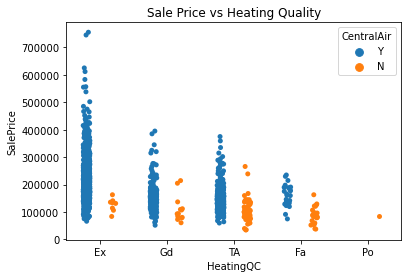

In [70]:
sns.stripplot(x = 'HeatingQC',y = 'SalePrice',data = raw_data,hue = 'CentralAir',jitter = True,split = True)
plt.title('Sale Price vs Heating Quality');

Having AC definitely escalates price of house

C:\Users\sony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Sale Price vs Full Bathrooms')

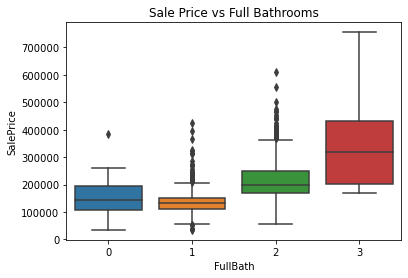

In [71]:
# FullBath: Full Bathrooms above grade
sns.boxplot(raw_data['FullBath'],raw_data['SalePrice'])
plt.title('Sale Price vs Full Bathrooms')

C:\Users\sony\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\sony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Sale Price vs Kitchen')

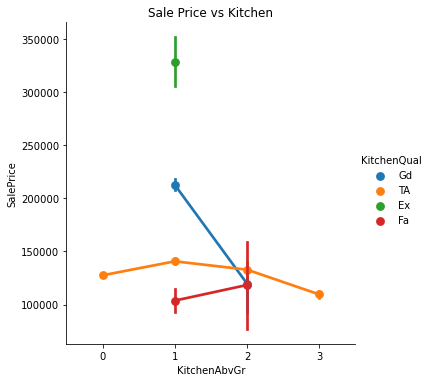

In [72]:
# KitchenQual: Kitchen quality
# Ex -> Excellent
# Gd -> Good 
# TA -> Typical/Average
# Fa -> Fair
# Po -> Poor

# Kitchen Quality
sns.factorplot('KitchenAbvGr','SalePrice',data = raw_data,hue = 'KitchenQual')
plt.title("Sale Price vs Kitchen")

# 7.2 Correlation Plot

ValueError: dictionary update sequence element #0 has length 4; 2 is required

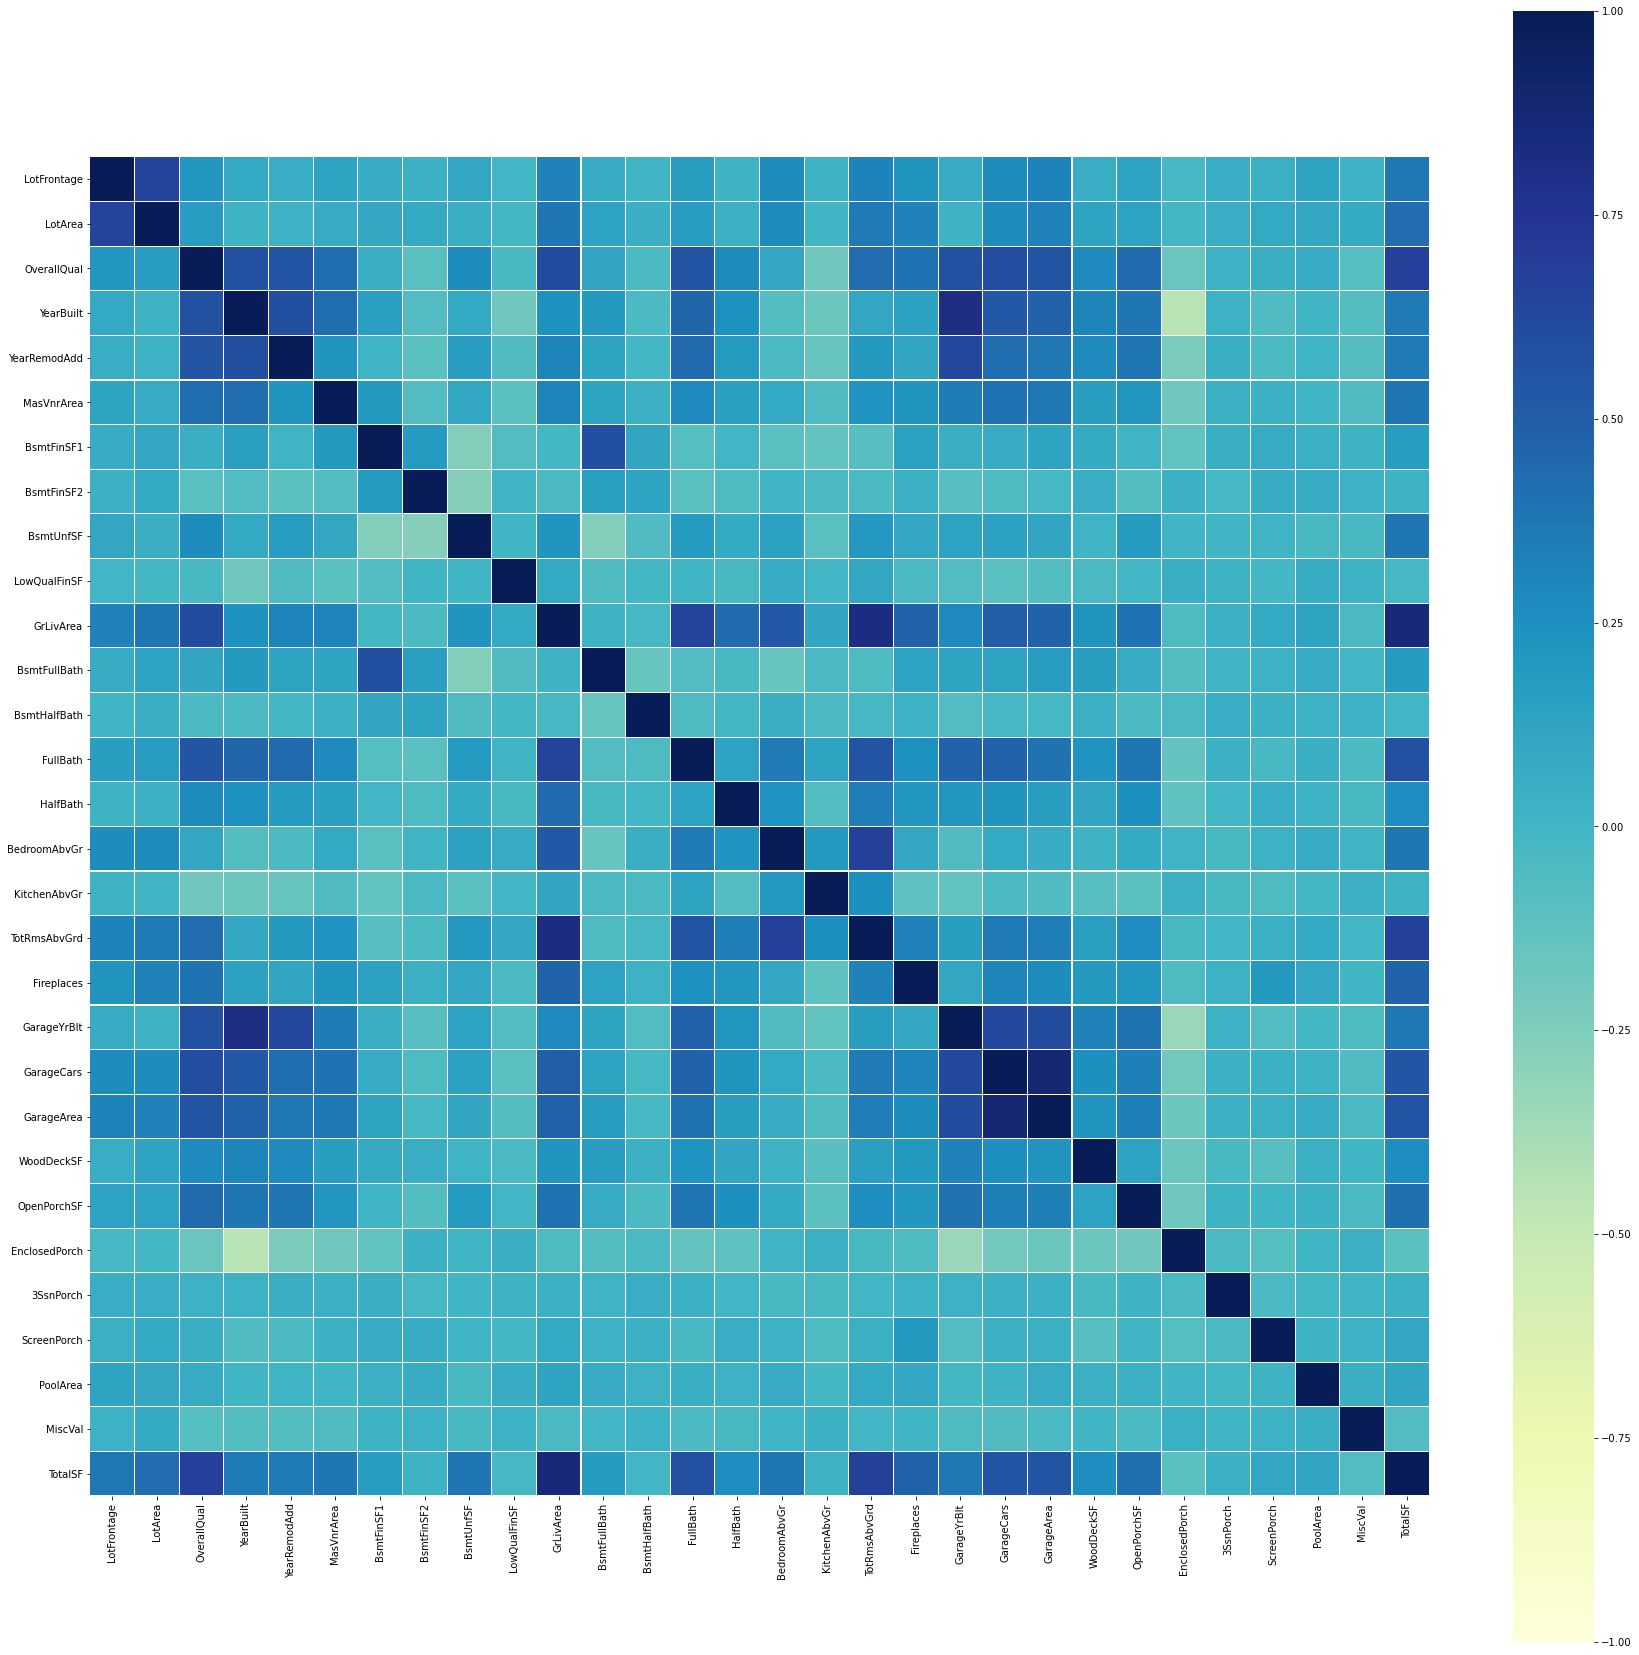

In [73]:
# Plotting correlation plot
import matplotlib.pyplot as plt
# method: pearson: standard correlation coefficient, kendall: Kendall Tau correlation coefficient, spearman: Spearman rank correlation 
corr = data_num.corr()
plt.figure(figsize = (30,30))

# seaborn.heatmap(data, vmin = None, vmax = None, cmap = None, center = None, robust = False, annot = None, fmt = '.2g', annot_kws = None, linewidths = 0, linecorlor = 'white', cbar = True, cbar_kws = None, char_ax = None, square = False, xticklabels ='auto', yticklabels = 'auto', mask = None, ax = None, **kwargs)
# [(corr >= 0.7) | (corr <= -0.7)]

# cmap: Color of the map
# annot = True: Write the data values in each column
# Linewidth: Width of the line that will divide each cell
# vmax and vmin: Values to anchor the colormap
sns.heatmap(corr,
            cmap = 'YlGnBu', vmax = 1.0,
            vmin = -1.0, linewidth = 0.1,annot = True,
             annot_kws = {"size", 20}, square = True);
plt.title("Correlation between features")

In [74]:
# 0.0 - 0.2 -> Weak Correlation
# 0.3 - 0.6 -> Moderate Correlation
# 0.7 - 1.0 -> Strong Correlation

# +1 Perfect positive
# -1 Perfect negative

ValueError: dictionary update sequence element #0 has length 4; 2 is required

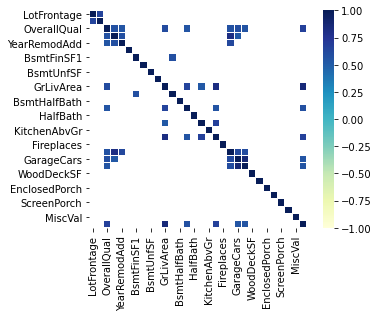

In [75]:
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)],
            cmap = 'YlGnBu', vmax = 1.0,
            vmin = -1.0, linewidth = 0.1
            ,annot = True,
             annot_kws = {"size", 15}, square = True);
plt.title("Correlation between features")

As we can see the above are the few features which show high multicollinearity from heatmap. DarkBlue squares on diagonal line has mulitcollinearity.

# 8. Linear Regression Modelling
# 8.1 Prepration of Datasets

In [76]:
# Let us now split the data into train and test 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(newdata, target_log, test_size = 0.30, random_state = 0)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (1022, 276)
x_test (438, 276)
y_train (1022,)
y_test (438,)


# 8.2 Building a linear Regression Based Model

In [77]:
# Lets build a Linear Regression model using stats model
import statsmodels.api as sm

# Building Linear Regression model as OLS
model1 = sm.OLS(y_train, x_train).fit()
# Note the swap of X and Y

In [78]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     65.93
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:23:07   Log-Likelihood:                 1105.2
No. Observations:                1022   AIC:                            -1680.
Df Residuals:                     757   BIC:                            -374.0
Df Model:                         264                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
LotFrontage               0.0851      0.051      1.655      0.098      -0.016       0.186
LotArea                   0.5265      0.079      6.652      0.000       0.371       0.682
OverallQual               0.3030      0.050      6.050      0.000       0.205       0.401
YearBuilt                 0.2539      0.065      3.889      0.000       0.126       0.382
YearRemodAdd              0.0493      0.019      2.624      0.009       0.012       0.086
MasVnrArea                0.0565      0.049      1.161      0.246      -0.039       0.152
BsmtFinSF1                0.0972      0.051      1.892      0.059      -0.004       0.198
BsmtFinSF2            -4.532e-06      0.077  -5.91e-05      1.000      -0.151       0.151
BsmtUnfSF                -0.0356      0.026     -1.382      0.167      -0.086       0.015
LowQualFinSF              0.0102      0.040      0.256      0.798      -0.068       0.088
GrLivArea                 0.6062      0.179      3.379      0.001       0.254       0.958
BsmtFullBath              0.0868      0.031      2.826      0.005       0.027       0.147
BsmtHalfBath              0.0445      0.027      1.671      0.095      -0.008       0.097
FullBath                  0.1092      0.036      3.039      0.002       0.039       0.180
HalfBath                  0.0599      0.024      2.487      0.013       0.013       0.107
BedroomAbvGr             -0.0742      0.062     -1.204      0.229      -0.195       0.047
KitchenAbvGr             -0.1747      0.115     -1.517      0.130      -0.401       0.051
TotRmsAbvGrd              0.0418      0.059      0.704      0.481      -0.075       0.158
Fireplaces                0.0574      0.036      1.581      0.114      -0.014       0.129
GarageYrBlt              -0.0152      0.037     -0.408      0.684      -0.089       0.058
GarageCars                0.0166      0.052      0.322      0.748      -0.085       0.118
GarageArea                0.1910      0.063      3.027      0.003       0.067       0.315
WoodDeckSF                0.0395      0.010      3.831      0.000       0.019       0.060
OpenPorchSF               0.0079      0.013      0.622      0.534      -0.017       0.033
EnclosedPorch             0.0095      0.015      0.618      0.537      -0.021       0.040
3SsnPorch                -0.0036      0.034     -0.108      0.914      -0.070       0.063
ScreenPorch               0.0384      0.016      2.476      0.013       0.008       0.069
PoolArea                 -0.0221      0.164     -0.135      0.893      -0.345       0.300
MiscVal                   0.0424      0.092      0.464      0.643      -0.137       0.222
TotalSF                   0.9426      0.215      4.389      0.000       0.521       1.364
MSSubClass_160           -0.0669      0.058     -1.152      0.250      -0.181       0.047
MSSubClass_180         

In [79]:
# rmse: Root mean squared error

def rmse(predictions, targets):
    differences = predictions - targets
    differences_squared = differences ** 2
    mean_of_differences_squared = differences_squared.mean()
    rmse_val = np.sqrt(mean_of_differences_squared)
    return rmse_val

In [80]:
cols = ['Model' , 'R - squared Error', 'Adj.R-Squared','RMSE']
models_report =  pd.DataFrame(columns = cols)
predictions1 = model1.predict(x_train)

# ?????

In [81]:
tmp1 = pd.Series({'Model':"Base Linear Regression Model",
                 "R-Squared Value": model1.rsquared,
                 'Adj.R-Squared Value': model1.rsquared_adj,
                  'RMSE':rmse(predictions1,y_test)})
model1_report = models_report.append(tmp1,ignore_index = True)
print(model1_report)

                          Model R - squared Error Adj.R-Squared RMSE  \
0  Base Linear Regression Model               NaN           NaN  NaN   

   Adj.R-Squared Value  R-Squared Value  
0             0.943786         0.958321  


# 8.3 Building model with Constant

In [82]:
# result = model.fit(x,y)
df_constant = sm.add_constant(newdata)

In [83]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(df_constant, target_log, test_size = 0.30, random_state = 0)

In [84]:
# Lets build Linear regression model using statmodel
model2 = sm.OLS(y_train1, x_train1).fit()

# Note the swap of X and Y

In [85]:
model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:                OLS              Adj. R-squared:     0.944     
Dependent Variable:   SalePrice        AIC:                -1680.3459
Date:                 2021-10-07 17:23 BIC:                -374.0239 
No. Observations:     1022             Log-Likelihood:     1105.2    
Df Model:             264              F-statistic:        65.93     
Df Residuals:         757              Prob (F-statistic): 0.00      
R-squared:            0.958            Scale:              0.0090908 
---------------------------------------------------------------------
                       Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
---------------------------------------------------------------------
const                  8.0428   0.2107 38.1759 0.0000  7.6293  8.4564
LotFrontage            0.0851   0.0514  1.6551 0.0983 -0.0158  0.1860
LotArea                0.5265   0.0792  6.6516 0.0000  0.3711  0.6819
OverallQual            0.3030   0.0501  6.0495 0.0000  0.2047  0.4014
YearBuilt              0.2539   0.0653  3.8895 0.0001  0.1258  0.3821
YearRemodAdd           0.0493   0.0188  2.6242 0.0089  0.0124  0.0861
MasVnrArea             0.0565   0.0487  1.1609 0.2460 -0.0390  0.1520
BsmtFinSF1             0.0972   0.0514  1.8925 0.0588 -0.0036  0.1980
BsmtFinSF2            -0.0000   0.0767 -0.0001 1.0000 -0.1505  0.1505
BsmtUnfSF             -0.0356   0.0258 -1.3822 0.1673 -0.0862  0.0150
LowQualFinSF           0.0102   0.0398  0.2562 0.7979 -0.0680  0.0884
GrLivArea              0.6062   0.1794  3.3789 0.0008  0.2540  0.9584
BsmtFullBath           0.0868   0.0307  2.8263 0.0048  0.0265  0.1471
BsmtHalfBath           0.0445   0.0267  1.6708 0.0952 -0.0078  0.0969
FullBath               0.1092   0.0359  3.0387 0.0025  0.0387  0.1798
HalfBath               0.0599   0.0241  2.4874 0.0131  0.0126  0.1072
BedroomAbvGr          -0.0742   0.0617 -1.2040 0.2290 -0.1953  0.0468
KitchenAbvGr          -0.1747   0.1152 -1.5165 0.1298 -0.4009  0.0515
TotRmsAbvGrd           0.0418   0.0593  0.7043 0.4815 -0.0747  0.1582
Fireplaces             0.0574   0.0363  1.5806 0.1144 -0.0139  0.1286
GarageYrBlt           -0.0152   0.0374 -0.4076 0.6837 -0.0887  0.0582
GarageCars             0.0166   0.0516  0.3216 0.7479 -0.0847  0.1179
GarageArea             0.1910   0.0631  3.0271 0.0026  0.0671  0.3148
WoodDeckSF             0.0395   0.0103  3.8307 0.0001  0.0193  0.0598
OpenPorchSF            0.0079   0.0127  0.6221 0.5341 -0.0170  0.0328
EnclosedPorch          0.0095   0.0153  0.6179 0.5368 -0.0206  0.0396
3SsnPorch             -0.0036   0.0337 -0.1076 0.9144 -0.0698  0.0626
ScreenPorch            0.0384   0.0155  2.4763 0.0135  0.0080  0.0689
PoolArea              -0.0221   0.1643 -0.1347 0.8929 -0.3447  0.3004
MiscVal                0.0424   0.0915  0.4635 0.6431 -0.1373  0.2221
TotalSF                0.9426   0.2148  4.3886 0.0000  0.5210  1.3643
MSSubClass_160        -0.0669   0.0581 -1.1523 0.2496 -0.1810  0.0471
MSSubClass_180         0.0585   0.0788  0.7421 0.4582 -0.0962  0.2132
MSSubClass_190        -0.0264   0.1541 -0.1716 0.8638 -0.3289  0.2760
MSSubClass_20         -0.0468   0.0677 -0.6913 0.4896 -0.1796  0.0861
MSSubClass_30         -0.0969   0.0719 -1.3465 0.1785 -0.2381  0.0444
MSSubClass_40          0.0255   0.1190  0.2144 0.8303 -0.2081  0.2592
MSSubClass_45         -0.5777   0.1738 -3.3238 0.0009 -0.9189 -0.2365
MSSubClass_50         -0.0921   0.0876 -1.0514 0.2934 -0.2641  0.0799
MSSubClass_60         -0.0705   0.0834 -0.8452 0.3982 -0.2342  0.0932
MSSubClass_70         -0.0425   0.0845 -0.5027 0.6153 -0.2084  0.1235
MSSubClass_75         -0.1089   0.1130 -0.9634 0.3356 -0.3306  0.1129
MSSubClass_80         -0.0825   0.1014 -0.8134 0.4163 -0.2817  0.1166
MSSubClass_85         -0.0194   0.0928 -0.2090 0.8345 -0.2016  0.1628
MSSubClass_90         -0.0399   0.0400 -0.9982 0.3

In [86]:
# Predicting the model on test data
predictions2 = model2.predict(x_test1)
tmp2 = pd.Series({'Model': "Linear Regression Model with Constant",
                 'R-Squared Value': model2.rsquared,
                 'Adj.R-Squared Value': model2.rsquared_adj,
                 'RMSE':rmse(predictions2, y_test1)})
model2_report = models_report.append(tmp2, ignore_index = True)
print(model2_report)

                                   Model  R - squared Error  Adj.R-Squared  \
0  Linear Regression Model with Constant                NaN            NaN   

       RMSE  Adj.R-Squared Value  R-Squared Value  
0  0.163991             0.943786         0.958321  


# Multicollinearity

$$ VIF = 1/(1-R^2) $$

A rule of thumb for interpreting the variance inflation factor:

1. 1 = Not correlated
2. Between 1 and 5 = moderately correlated
3. Greater than 5 = highly correlated


# 8.4 Calculating Variance Inflation Factor(VIF)

In [87]:
print(" \n Variance Inflation Factor")
cnames = x_train1.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train1[yvar], x_train1[xvars])
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print(yvar, round(vif,3))

 
 Variance Inflation Factor


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


const 0.0
LotFrontage 3.914
LotArea 7.1
OverallQual 6.415
YearBuilt 22.987
YearRemodAdd 4.624
MasVnrArea 33.713
BsmtFinSF1 35.584
BsmtFinSF2 43.94
BsmtUnfSF 4.084
LowQualFinSF 2.479
GrLivArea 50.106
BsmtFullBath 3.124
BsmtHalfBath 1.72
FullBath 4.729
HalfBath 4.043
BedroomAbvGr 4.303
KitchenAbvGr 6.223
TotRmsAbvGrd 7.162
Fireplaces 6.644
GarageYrBlt 8.266
GarageCars 10.072
GarageArea 9.694
WoodDeckSF 1.782
OpenPorchSF 2.119
EnclosedPorch 2.074
3SsnPorch 1.451
ScreenPorch 1.459
PoolArea 8.346
MiscVal 18.016
TotalSF 38.953
MSSubClass_160 16.979
MSSubClass_180 2.721
MSSubClass_190 53.719
MSSubClass_20 119.867
MSSubClass_30 25.522
MSSubClass_40 4.661
MSSubClass_45 36.157
MSSubClass_50 75.46
MSSubClass_60 129.837
MSSubClass_70 33.816
MSSubClass_75 13.904
MSSubClass_80 39.321
MSSubClass_85 12.157


<ipython-input-87-e90644ec5454>:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1-res.rsquared)


MSSubClass_90 inf
MSZoning_FV 17.048
MSZoning_RH 5.882
MSZoning_RL 54.602
MSZoning_RM 35.548
Street_Pave 2.076
Alley_Pave 2.548
LotShape_IR2 1.538
LotShape_IR3 1.541
LotShape_Reg 1.883
LandContour_HLS 2.818
LandContour_Low 3.659
LandContour_Lvl 4.557
Utilities_NoSeWa 2.088
LotConfig_CulDSac 2.128
LotConfig_FR2 1.464
LotConfig_FR3 2.505
LotConfig_Inside 2.066
LandSlope_Mod 2.349
LandSlope_Sev 3.12
Neighborhood_Blueste 1.864
Neighborhood_BrDale 4.659
Neighborhood_BrkSide 12.882
Neighborhood_ClearCr 6.774
Neighborhood_CollgCr 17.896
Neighborhood_Crawfor 9.455
Neighborhood_Edwards 15.554
Neighborhood_Gilbert 10.495
Neighborhood_IDOTRR 10.33
Neighborhood_MeadowV 5.522
Neighborhood_Mitchel 8.634
Neighborhood_NAmes 29.186
Neighborhood_NPkVill 3.427
Neighborhood_NWAmes 11.352
Neighborhood_NoRidge 6.97
Neighborhood_NridgHt 10.005
Neighborhood_OldTown 23.321
Neighborhood_SWISU 5.726
Neighborhood_Sawyer 13.567
Neighborhood_SawyerW 9.331
Neighborhood_Somerst 13.852
Neighborhood_StoneBr 3.962
Neigh

C:\Users\sony\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Condition2_PosA nan
Condition2_PosN 3.414
Condition2_RRAe 7.556
Condition2_RRAn nan
Condition2_RRNn nan
BldgType_2fmCon 40.387
BldgType_Duplex inf
BldgType_Twnhs 16.38
BldgType_TwnhsE 37.675
HouseStyle_1.5Unf 35.325
HouseStyle_1Story 80.178
HouseStyle_2.5Fin 4.489
HouseStyle_2.5Unf 7.004
HouseStyle_2Story 54.686
HouseStyle_SFoyer 12.368
HouseStyle_SLvl 25.805
OverallCond_2 inf
OverallCond_3 inf
OverallCond_4 inf
OverallCond_5 inf
OverallCond_6 inf
OverallCond_7 inf
OverallCond_8 inf
OverallCond_9 inf
RoofStyle_Gable 134.769
RoofStyle_Gambrel 7.833
RoofStyle_Hip 124.41
RoofStyle_Mansard 6.386
RoofStyle_Shed 7.203
RoofMatl_CompShg inf
RoofMatl_Membran nan
RoofMatl_Metal inf
RoofMatl_Roll inf
RoofMatl_Tar&Grv inf
RoofMatl_WdShake inf
RoofMatl_WdShngl inf
Exterior1st_AsphShn inf
Exterior1st_BrkComm 2.923
Exterior1st_BrkFace 21.464
Exterior1st_CBlock inf
Exterior1st_CemntBd 47.424
Exterior1st_HdBoard 84.614
Exterior1st_ImStucc 1.894
Exterior1st_MetalSd 111.521
Exterior1st_Plywood 51.067
Ext

Removing variable that has threshold value of VIF above 100



**Removing variable having threshold value above 100**

In [88]:
vif_100 = ['MSSubClass_20','MSSubClass_60','RoofStyle_Gable','RoofStyle_Hip', 'Exterior1st_MetalSd', 'Exterior1st_VinylSd', 'Exterior2nd_VinylSd', 'GarageQual_TA', 'GarageCond_TA']

# Custom function to remove variables having higer VIF
to_keep = [x for x in x_train1 if x not in vif_100]

# print(to_keep)
x_train2 = x_train1[to_keep]
print(x_train2.head())

      const  LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  \
64      1.0     0.435403  0.386603     0.666667   0.905797      0.800000   
682     1.0     0.435403  0.156094     0.555556   0.898551      0.783333   
960     1.0     0.316280  0.335129     0.444444   0.623188      0.966667   
1384    1.0     0.383633  0.379914     0.555556   0.485507      0.000000   
1100    1.0     0.383633  0.365110     0.111111   0.347826      0.000000   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLI  \
64      0.860978    0.764789         0.0   0.743260  ...               0   
682     0.000000    0.800107         0.0   0.730528  ...               0   
960     0.000000    0.757859         0.0   0.656697  ...               0   
1384    0.000000    0.616194         0.0   0.757770  ...               0   
1100    0.000000    0.656747         0.0   0.000000  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
64                 0 

# 8.4.1 Building the Model after removing VIF above 100

In [89]:
# Lets build Linear Regression Model using stats model

# Building Linear Regression model using OLS
model3 = sm.OLS(y_train1,x_train2).fit()

# Note the swap of X and Y
# Printing the Linear Regression Summary
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     67.52
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:23:48   Log-Likelihood:                 1094.1
No. Observations:                1022   AIC:                            -1676.
Df Residuals:                     766   BIC:                            -414.2
Df Model:                         255                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     8.0247      0.197     40.784      0.000       7.638       8.411
LotFrontage               0.1036      0.051      2.022      0.044       0.003       0.204
LotArea                   0.4994      0.076      6.580      0.000       0.350       0.648
OverallQual               0.3188      0.050      6.427      0.000       0.221       0.416
YearBuilt                 0.2397      0.065      3.711      0.000       0.113       0.367
YearRemodAdd              0.0500      0.019      2.697      0.007       0.014       0.086
MasVnrArea                0.0667      0.049      1.374      0.170      -0.029       0.162
BsmtFinSF1                0.1082      0.051      2.111      0.035       0.008       0.209
BsmtFinSF2               -0.0099      0.076     -0.130      0.897      -0.159       0.140
BsmtUnfSF                -0.0376      0.026     -1.457      0.146      -0.088       0.013
LowQualFinSF              0.0274      0.040      0.690      0.491      -0.051       0.105
GrLivArea                 0.6118      0.179      3.417      0.001       0.260       0.963
BsmtFullBath              0.0861      0.031      2.813      0.005       0.026       0.146
BsmtHalfBath              0.0407      0.027      1.531      0.126      -0.011       0.093
FullBath                  0.1036      0.036      2.880      0.004       0.033       0.174
HalfBath                  0.0569      0.024      2.401      0.017       0.010       0.103
BedroomAbvGr             -0.0834      0.061     -1.358      0.175      -0.204       0.037
KitchenAbvGr             -0.1692      0.112     -1.509      0.132      -0.389       0.051
TotRmsAbvGrd              0.0698      0.059      1.182      0.238      -0.046       0.186
Fireplaces                0.0477      0.036      1.319      0.187      -0.023       0.119
GarageYrBlt              -0.0063      0.037     -0.168      0.867      -0.079       0.067
GarageCars                0.0129      0.051      0.251      0.802      -0.088       0.114
GarageArea                0.1485      0.062      2.402      0.017       0.027       0.270
WoodDeckSF                0.0367      0.010      3.560      0.000       0.016       0.057
OpenPorchSF               0.0082      0.013      0.649      0.517      -0.017       0.033
EnclosedPorch             0.0092      0.015      0.603      0.547      -0.021       0.039
3SsnPorch                -0.0099      0.034     -0.294      0.769      -0.076       0.056
ScreenPorch               0.0453      0.015      2.951      0.003       0.015       0.076
PoolArea                 -0.0929      0.161     -0.576      0.565      -0.410       0.224
MiscVal                   0.0487      0.092      0.532      0.595      -0.131       0.228
TotalSF                   0.9487      0.215      4.407      0.000       0.526       1.371
MSSubClass_160         

In [90]:
# Removing the columns with VIF greater than 100 from test data also.
to_keep = [x for x in x_test if x not in vif_100]
x_test2 = x_test1[to_keep]
x_test2.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
529,0.435403,0.630948,0.555556,0.615942,0.416667,0.435403,0.822664,0.000000,0.864505,0.0,...,0,0,0,0,1,0,1,0,0,0
491,0.485634,0.388990,0.555556,0.500000,0.000000,0.000000,0.694727,0.700617,0.706037,0.0,...,0,0,0,0,1,0,0,0,1,0
459,0.435403,0.329845,0.444444,0.565217,0.000000,0.689527,0.604935,0.000000,0.807490,0.0,...,0,0,0,0,1,0,0,0,1,0
279,0.503987,0.399333,0.666667,0.760870,0.450000,0.773040,0.691531,0.000000,0.856699,0.0,...,0,0,0,0,1,0,0,0,1,0
655,0.000000,0.050161,0.555556,0.717391,0.350000,0.805789,0.000000,0.000000,0.807736,0.0,...,0,0,0,0,1,0,0,1,0,0


In [91]:
predictions3 = model3.predict(x_test2)

tmp3 = pd.Series({'Model': 'LRM after removing VIF above 100',
                 'R-Squared Value': model3.rsquared,
                 'Adj-R-Squared': model3.rsquared_adj,
                 'RMSE': rmse(predictions3, y_test1)})

model3_report = models_report.append(tmp3, ignore_index = True)
model3_report

ValueError: shapes (438,267) and (268,) not aligned: 267 (dim 1) != 268 (dim 0)

#### Checking variable having VIF above 10

In [92]:
# Removing variable has threshold value of VIF above 10
print('\n Variance Inflation Factor')
cnames = x_train2.columns

for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train2[yvar], (x_train2[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print(yvar, round(vif,3))


 Variance Inflation Factor


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


const 0.0
LotFrontage 3.854
LotArea 6.463
OverallQual 6.229
YearBuilt 22.288
YearRemodAdd 4.456
MasVnrArea 33.212
BsmtFinSF1 35.08
BsmtFinSF2 42.983
BsmtUnfSF 4.054
LowQualFinSF 2.436
GrLivArea 49.405
BsmtFullBath 3.073
BsmtHalfBath 1.693
FullBath 4.688
HalfBath 3.868
BedroomAbvGr 4.23
KitchenAbvGr 5.835
TotRmsAbvGrd 7.035
Fireplaces 6.536
GarageYrBlt 8.118
GarageCars 9.86
GarageArea 9.222
WoodDeckSF 1.758
OpenPorchSF 2.075
EnclosedPorch 2.027
3SsnPorch 1.437
ScreenPorch 1.416
PoolArea 7.964
MiscVal 17.837
TotalSF 38.743
MSSubClass_160 5.905
MSSubClass_180 2.65
MSSubClass_190 41.502
MSSubClass_30 3.352
MSSubClass_40 3.162
MSSubClass_45 30.116
MSSubClass_50 22.147
MSSubClass_70 4.189
MSSubClass_75 7.396
MSSubClass_80 19.296
MSSubClass_85 5.626


<ipython-input-92-ed39a42f3f05>:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1-res.rsquared)


MSSubClass_90 inf
MSZoning_FV 16.837
MSZoning_RH 5.757
MSZoning_RL 53.945
MSZoning_RM 35.125
Street_Pave 1.983
Alley_Pave 2.529
LotShape_IR2 1.484
LotShape_IR3 1.534
LotShape_Reg 1.865
LandContour_HLS 2.755
LandContour_Low 3.481
LandContour_Lvl 4.457
Utilities_NoSeWa 2.01
LotConfig_CulDSac 2.086
LotConfig_FR2 1.45
LotConfig_FR3 2.486
LotConfig_Inside 2.002
LandSlope_Mod 2.32
LandSlope_Sev 3.089
Neighborhood_Blueste 1.858
Neighborhood_BrDale 4.635
Neighborhood_BrkSide 12.749
Neighborhood_ClearCr 6.389
Neighborhood_CollgCr 17.771
Neighborhood_Crawfor 9.33
Neighborhood_Edwards 15.371
Neighborhood_Gilbert 10.415
Neighborhood_IDOTRR 10.187
Neighborhood_MeadowV 5.472
Neighborhood_Mitchel 8.531
Neighborhood_NAmes 28.892
Neighborhood_NPkVill 3.405
Neighborhood_NWAmes 11.261
Neighborhood_NoRidge 6.934
Neighborhood_NridgHt 9.872
Neighborhood_OldTown 23.11
Neighborhood_SWISU 5.704
Neighborhood_Sawyer 13.482
Neighborhood_SawyerW 9.24
Neighborhood_Somerst 13.688
Neighborhood_StoneBr 3.885
Neighborh

C:\Users\sony\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Condition2_PosN 3.298
Condition2_RRAe 7.457
Condition2_RRAn nan
Condition2_RRNn nan
BldgType_2fmCon 40.003
BldgType_Duplex inf
BldgType_Twnhs 3.913
BldgType_TwnhsE 4.046
HouseStyle_1.5Unf 32.584
HouseStyle_1Story 56.254
HouseStyle_2.5Fin 4.331
HouseStyle_2.5Unf 6.583
HouseStyle_2Story 47.875
HouseStyle_SFoyer 10.967
HouseStyle_SLvl 25.226
OverallCond_2 inf
OverallCond_3 inf
OverallCond_4 inf
OverallCond_5 inf
OverallCond_6 inf
OverallCond_7 inf
OverallCond_8 inf
OverallCond_9 inf
RoofStyle_Gambrel 1.849
RoofStyle_Mansard 1.821
RoofStyle_Shed 5.779
RoofMatl_CompShg inf
RoofMatl_Membran nan
RoofMatl_Metal inf
RoofMatl_Roll inf
RoofMatl_Tar&Grv inf
RoofMatl_WdShake inf
RoofMatl_WdShngl inf
Exterior1st_AsphShn inf
Exterior1st_BrkComm 2.428
Exterior1st_BrkFace 6.06
Exterior1st_CBlock inf
Exterior1st_CemntBd 29.95
Exterior1st_HdBoard 17.441
Exterior1st_ImStucc 1.398
Exterior1st_Plywood 10.407
Exterior1st_Stone 2.239
Exterior1st_Stucco 5.656
Exterior1st_Wd Sdng 13.478
Exterior1st_WdShing 3.34

# Below are the variable having above 10 VIF Threshold

In [93]:
VIF_10 = ['YearBuilt','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'MiscVal', 'TotalSF', 'MSSubClass_190',
          'MSSubClass_45','MSSubClass_50', 'MSSubClass_80', 'MSZoning_FV', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_BrkSide',
         'Neighborhood_CollgCr','Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_NAmes',
         'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_Somerst', 'Condition2_Feedr', 'Condition2_Norm',
         'BldgType_2fmCon','HouseStyle_1.5Unf', 'HouseStyle_1Story','HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl',
         'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_Plywood', 'Exterior1st_Wd Sdng','Exterior2nd_CmentBd', 
         'Exterior2nd_HdBoard', 'Exterior2nd_Plywood', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_None',
          'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_TA', 'Foundation_PConc', 'BsmtQual_TA',
         'BsmtFinType1_Unf', 'BsmtFinType2_Unf','Heating_GasA','Heating_GasW', 'Heating_GasW', 'Heating_Gasv', 'KitchenQual_TA',
         'Functional_Typ', 'GarageType_Attchd', 'GarageType_Detchd', 'MiscFeature_Shed', 'SaleType_New','SaleCondition_Partial']

to_keep = [x for x in x_train2 if x not in VIF_10]
# print(to_keep)
x_train2 = x_train2[to_keep]
x_train2.head()


,const,LotFrontage,LotArea,OverallQual,YearRemodAdd,BsmtUnfSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
64,1.0,0.435403,0.386603,0.666667,0.800000,0.743260,0.0,0.333333,0.0,0.666667,...,0,0,0,0,0,1,0,0,0,1
682,1.0,0.435403,0.156094,0.555556,0.783333,0.730528,0.0,0.333333,0.0,0.333333,...,0,0,0,0,0,1,0,0,0,1
960,1.0,0.316280,0.335129,0.444444,0.966667,0.656697,0.0,0.333333,0.0,0.333333,...,0,0,0,0,0,1,0,0,0,1
1384,1.0,0.383633,0.379914,0.555556,0.000000,0.757770,0.0,0.000000,0.0,0.333333,...,0,0,0,0,0,1,0,0,0,1
1100,1.0,0.383633,0.365110,0.111111,0.000000,0.000000,0.0,0.000000,0.0,0.333333,...,0,0,0,0,0,1,0,0,0,1


# 8.4.2 Building model after removing VIF above 10

In [94]:
# Lets build Linear Regression model using statsmodel
# Building Linear Regression model using OLS

model4 = sm.OLS(y_train1, x_train2).fit()
# Note the Svap of X and Y
# Printing Linear Regression Summary

model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     49.99
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:24:55   Log-Likelihood:                 787.11
No. Observations:                1022   AIC:                            -1180.
Df Residuals:                     825   BIC:                            -209.1
Df Model:                         196                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     8.2448      0.107     76.743      0.000       8.034       8.456
LotFrontage               0.1729      0.063      2.735      0.006       0.049       0.297
LotArea                   0.4596      0.087      5.286      0.000       0.289       0.630
OverallQual               0.6998      0.055     12.774      0.000       0.592       0.807
YearRemodAdd              0.0926      0.022      4.178      0.000       0.049       0.136
BsmtUnfSF                 0.0234      0.028      0.844      0.399      -0.031       0.078
LowQualFinSF             -0.0544      0.046     -1.173      0.241      -0.145       0.037
BsmtFullBath              0.1818      0.034      5.408      0.000       0.116       0.248
BsmtHalfBath              0.0651      0.033      1.979      0.048       0.001       0.130
FullBath                  0.2663      0.040      6.646      0.000       0.188       0.345
HalfBath                  0.0900      0.023      3.995      0.000       0.046       0.134
BedroomAbvGr              0.0134      0.074      0.181      0.856      -0.132       0.159
KitchenAbvGr             -0.2552      0.113     -2.265      0.024      -0.476      -0.034
TotRmsAbvGrd              0.3705      0.063      5.904      0.000       0.247       0.494
Fireplaces                0.1566      0.045      3.488      0.001       0.068       0.245
GarageYrBlt              -0.0106      0.044     -0.244      0.808      -0.096       0.075
GarageCars                0.0789      0.060      1.316      0.188      -0.039       0.197
GarageArea                0.3033      0.074      4.088      0.000       0.158       0.449
WoodDeckSF                0.0438      0.013      3.359      0.001       0.018       0.069
OpenPorchSF               0.0324      0.015      2.134      0.033       0.003       0.062
EnclosedPorch            -0.0363      0.018     -1.995      0.046      -0.072      -0.001
3SsnPorch                 0.0131      0.042      0.308      0.758      -0.070       0.096
ScreenPorch               0.0575      0.019      2.968      0.003       0.019       0.096
PoolArea                 -0.0740      0.193     -0.383      0.702      -0.453       0.305
MSSubClass_160           -0.0424      0.039     -1.086      0.278      -0.119       0.034
MSSubClass_180           -0.0406      0.078     -0.522      0.602      -0.193       0.112
MSSubClass_30            -0.1078      0.025     -4.230      0.000      -0.158      -0.058
MSSubClass_40             0.1377      0.115      1.193      0.233      -0.089       0.364
MSSubClass_70            -0.0165      0.027     -0.603      0.547      -0.070       0.037
MSSubClass_75             0.0716      0.092      0.776      0.438      -0.110       0.253
MSSubClass_85            -0.0097      0.041     -0.238      0.812      -0.089       0.070
MSSubClass_90          

In [95]:
to_keep = [x for x in x_test2 if x not in VIF_10]
# print(to_keep)
x_test2 = x_test2[to_keep]
x_test2.head()


,LotFrontage,LotArea,OverallQual,YearRemodAdd,BsmtUnfSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
529,0.435403,0.630948,0.555556,0.416667,0.864505,0.0,0.333333,0.0,1.000000,0.0,...,0,0,0,0,0,1,0,1,0,0
491,0.485634,0.388990,0.555556,0.000000,0.706037,0.0,0.333333,0.0,0.333333,0.0,...,0,0,0,0,0,1,0,0,0,1
459,0.435403,0.329845,0.444444,0.000000,0.807490,0.0,0.333333,0.0,0.333333,0.0,...,0,0,0,0,0,1,0,0,0,1
279,0.503987,0.399333,0.666667,0.450000,0.856699,0.0,0.000000,0.0,0.666667,0.5,...,0,0,0,0,0,1,0,0,0,1
655,0.000000,0.050161,0.555556,0.350000,0.807736,0.0,0.000000,0.0,0.333333,0.5,...,0,0,0,0,0,1,0,0,1,0


In [96]:
predictions4 = model4.predict(x_test2)
tmp4 = pd.Series({'Model': 'LRM after removing VIF above 10',
                 'R-Squared Value': model4.rsquared,
                 'Adj.R-Squared Value': model4.rsquared_adj,
                 'RMSE': rmse(predictions4,y_test1)})

model4_report = models_report.append(tmp4, ignore_index = True)
model4_report.head()

ValueError: shapes (438,208) and (209,) not aligned: 208 (dim 1) != 209 (dim 0)

# Checking variable having VIF above 5

In [97]:
# Removing variable has threshold value of VIF above 5
print(" \n Variance Inflation Factor")

cnames = x_train2.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train2[yvar], x_train2[xvars])
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print(yvar,round(vif,3))


 
 Variance Inflation Factor
const 0.0


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


LotFrontage 3.466
LotArea 5.008
OverallQual 4.487
YearRemodAdd 3.77
BsmtUnfSF 2.765
LowQualFinSF 1.965
BsmtFullBath 2.188
BsmtHalfBath 1.53
FullBath 3.439
HalfBath 2.068
BedroomAbvGr 3.632
KitchenAbvGr 3.481
TotRmsAbvGrd 4.689
Fireplaces 5.943
GarageYrBlt 6.594
GarageCars 7.956
GarageArea 7.838
WoodDeckSF 1.66
OpenPorchSF 1.779
EnclosedPorch 1.707
3SsnPorch 1.343
ScreenPorch 1.332
PoolArea 6.748
MSSubClass_160 4.493
MSSubClass_180 1.548
MSSubClass_30 1.873
MSSubClass_40 2.567
MSSubClass_70 2.071
MSSubClass_75 5.432
MSSubClass_85 1.365
MSSubClass_90 inf
MSZoning_RH

<ipython-input-97-027d4c026f09>:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1-res.rsquared)


 1.435
Street_Pave 1.511
Alley_Pave 1.81
LotShape_IR2 1.405
LotShape_IR3 1.435
LotShape_Reg 1.621
LandContour_HLS 2.347
LandContour_Low 2.958
LandContour_Lvl 3.828
Utilities_NoSeWa 1.397
LotConfig_CulDSac 1.917
LotConfig_FR2 1.344
LotConfig_FR3 1.709
LotConfig_Inside 1.858
LandSlope_Mod 1.991
LandSlope_Sev 2.619
Neighborhood_Blueste 1.354
Neighborhood_BrDale 2.02
Neighborhood_ClearCr 1.678
Neighborhood_Crawfor 1.802
Neighborhood_MeadowV 1.851
Neighborhood_Mitchel 1.44
Neighborhood_NPkVill 2.28
Neighborhood_NWAmes 1.587
Neighborhood_NoRidge 1.478
Neighborhood_NridgHt 1.825
Neighborhood_SWISU 1.701
Neighborhood_SawyerW 1.506
Neighborhood_StoneBr 1.476
Neighborhood_Timber 1.534
Neighborhood_Veenker 1.205
Condition1_Feedr 4.06
Condition1_Norm 6.53
Condition1_PosA 1.64
Condition1_PosN 2.168
Condition1_RRAe 1.954
Condition1_RRAn 2.109
Condition1_RRNe 1.293
Condition1_RRNn 1.808


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Condition2_PosA nan
Condition2_PosN 1.303
Condition2_RRAe 3.942
Condition2_RRAn nan
Condition2_RRNn nan
BldgType_Duplex inf
BldgType_Twnhs 3.518
BldgType_TwnhsE 3.044
HouseStyle_2.5Fin 3.041
HouseStyle_2.5Unf 4.213
OverallCond_2 inf
OverallCond_3 inf
OverallCond_4 inf
OverallCond_5 inf
OverallCond_6 inf
OverallCond_7 inf
OverallCond_8 inf
OverallCond_9 inf
RoofStyle_Gambrel 1.466
RoofStyle_Mansard 1.642
RoofStyle_Shed 5.372
RoofMatl_CompShg inf
RoofMatl_Membran nan
RoofMatl_Metal inf
RoofMatl_Roll inf
RoofMatl_Tar&Grv inf
RoofMatl_WdShake inf
RoofMatl_WdShngl inf
Exterior1st_AsphShn inf
Exterior1st_BrkComm 2.068
Exterior1st_BrkFace 2.93
Exterior1st_CBlock inf
Exterior1st_ImStucc 1.296
Exterior1st_Stone 1.765
Exterior1st_Stucco 3.917
Exterior1st_WdShing 1.859
Exterior2nd_AsphShn inf
Exterior2nd_Brk Cmn 2.942
Exterior2nd_BrkFace 2.734
Exterior2nd_CBlock inf
Exterior2nd_ImStucc 1.448
Exterior2nd_MetalSd 1.633
Exterior2nd_Other 1.173
Exterior2nd_Stone 2.012
Exterior2nd_Stucco 3.841
Exterio

# Below are the variable having above 5 VIF threshold

In [98]:
VIF_5 = ['LotArea', 'Fireplaces', 'GarageYrBlt','GarageCars','GarageArea','PoolArea', 'MSSubClass_75','Condition1_Norm',
        'RoofStyle_Shed', 'PoolQC_Gd', 'MoSold_6', 'MoSold_7']

to_keep = [x for x in x_train2 if x not in VIF_5]
# print(to keep)

x_train2 = x_train2[to_keep]
x_train2.head()

,const,LotFrontage,OverallQual,YearRemodAdd,BsmtUnfSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
64,1.0,0.435403,0.666667,0.800000,0.743260,0.0,0.333333,0.0,0.666667,0.5,...,0,0,0,0,0,1,0,0,0,1
682,1.0,0.435403,0.555556,0.783333,0.730528,0.0,0.333333,0.0,0.333333,0.0,...,0,0,0,0,0,1,0,0,0,1
960,1.0,0.316280,0.444444,0.966667,0.656697,0.0,0.333333,0.0,0.333333,0.0,...,0,0,0,0,0,1,0,0,0,1
1384,1.0,0.383633,0.555556,0.000000,0.757770,0.0,0.000000,0.0,0.333333,0.0,...,0,0,0,0,0,1,0,0,0,1
1100,1.0,0.383633,0.111111,0.000000,0.000000,0.0,0.000000,0.0,0.333333,0.0,...,0,0,0,0,0,1,0,0,0,1


## 8.4.3 Building Model after removing VIF above 5

In [99]:
# Lets build Linear Regression model using statsmodel
# Build Linear Regression model using OLS

model5 = sm.OLS(y_train1,x_train2).fit()

# Note the swap of X and Y
# Printing Linear Regression Summary

model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     44.78
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:25:55   Log-Likelihood:                 699.31
No. Observations:                1022   AIC:                            -1029.
Df Residuals:                     837   BIC:                            -116.7
Df Model:                         184                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     8.4435      0.106     79.913      0.000       8.236       8.651
LotFrontage               0.3588      0.064      5.616      0.000       0.233       0.484
OverallQual               0.7985      0.057     13.994      0.000       0.687       0.911
YearRemodAdd              0.0914      0.023      3.954      0.000       0.046       0.137
BsmtUnfSF                 0.0372      0.030      1.250      0.212      -0.021       0.096
LowQualFinSF             -0.0732      0.047     -1.553      0.121      -0.166       0.019
BsmtFullBath              0.2278      0.036      6.344      0.000       0.157       0.298
BsmtHalfBath              0.0551      0.034      1.603      0.109      -0.012       0.123
FullBath                  0.3163      0.042      7.481      0.000       0.233       0.399
HalfBath                  0.1028      0.024      4.271      0.000       0.056       0.150
BedroomAbvGr             -0.0862      0.077     -1.118      0.264      -0.238       0.065
KitchenAbvGr             -0.2624      0.117     -2.244      0.025      -0.492      -0.033
TotRmsAbvGrd              0.4873      0.067      7.282      0.000       0.356       0.619
WoodDeckSF                0.0532      0.014      3.820      0.000       0.026       0.081
OpenPorchSF               0.0423      0.016      2.597      0.010       0.010       0.074
EnclosedPorch            -0.0447      0.019     -2.295      0.022      -0.083      -0.006
3SsnPorch                 0.0194      0.046      0.426      0.670      -0.070       0.109
ScreenPorch               0.0705      0.021      3.397      0.001       0.030       0.111
MSSubClass_160           -0.0578      0.041     -1.394      0.164      -0.139       0.024
MSSubClass_180           -0.0553      0.083     -0.663      0.507      -0.219       0.108
MSSubClass_30            -0.1046      0.027     -3.827      0.000      -0.158      -0.051
MSSubClass_40             0.1972      0.102      1.937      0.053      -0.003       0.397
MSSubClass_70            -0.0062      0.029     -0.214      0.831      -0.063       0.051
MSSubClass_85             0.0207      0.044      0.475      0.635      -0.065       0.106
MSSubClass_90             0.0110      0.022      0.509      0.611      -0.032       0.054
MSZoning_RH               0.0112      0.043      0.259      0.795      -0.074       0.096
Street_Pave               0.1555      0.072      2.157      0.031       0.014       0.297
Alley_Pave                0.1234      0.032      3.828      0.000       0.060       0.187
LotShape_IR2              0.0598      0.029      2.036      0.042       0.002       0.117
LotShape_IR3              0.1039      0.065      1.591      0.112      -0.024       0.232
LotShape_Reg              0.0002      0.011      0.017      0.986      -0.021       0.022
LandContour_HLS        

In [100]:
to_keep = [x for x in x_test2 if x not in VIF_5]
# print(to_keep)
x_test2 = x_test2[to_keep]
x_test2.head()


,LotFrontage,OverallQual,YearRemodAdd,BsmtUnfSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
529,0.435403,0.555556,0.416667,0.864505,0.0,0.333333,0.0,1.000000,0.0,0.500,...,0,0,0,0,0,1,0,1,0,0
491,0.485634,0.555556,0.000000,0.706037,0.0,0.333333,0.0,0.333333,0.0,0.375,...,0,0,0,0,0,1,0,0,0,1
459,0.435403,0.444444,0.000000,0.807490,0.0,0.333333,0.0,0.333333,0.0,0.375,...,0,0,0,0,0,1,0,0,0,1
279,0.503987,0.666667,0.450000,0.856699,0.0,0.000000,0.0,0.666667,0.5,0.500,...,0,0,0,0,0,1,0,0,0,1
655,0.000000,0.555556,0.350000,0.807736,0.0,0.000000,0.0,0.333333,0.5,0.375,...,0,0,0,0,0,1,0,0,1,0


In [101]:
predictions5 = model5.predict(x_test2)
tmp5 = pd.Series({'Model': 'LRM after removing VIF above 5',
                 'R-Squared Value': model5.rsquared,
                 'Adj.R-Squared Value': model5.rsquared_adj,
                 'RMSE': rmse(predictions5,y_test1)})

model5_report = models_report.append(tmp5, ignore_index = True)
model5_report

ValueError: shapes (438,196) and (197,) not aligned: 196 (dim 1) != 197 (dim 0)